In [1]:
basepath = 'C:\GitHub\FUSE'
output_folder = 'C:/CWatM_output_Examples/CWatM_output_14Oct' #_Examples/CWatM_output_full2015_normal'
photo_folder = basepath+ '\Images'
original_outputFolder = output_folder
from PIL import Image
import pandas as pd

<img style="float: right;" src="https://drive.google.com/uc?export=view&id=1qVA-sPHp5TY5D7enbU7mF4zZ8obu5wrC" width=120 height=120 />

# Land Cover & Use

The flow of water through and within cells is influenced by the distribution of land covers and use. The flows addressed separately for each land cover include irrigation, soil infiltration & percolation, groundwater recharge, capillary rise, evapotranspiration, and runoff. 

There are six land covers in CWatM:
0. Forest,
1. Grasslands (rainfed fields),
2. Paddy fields,
3. Irrigated fields,
4. Sealed,
5. Water.


### Crops
Irrigated and rainfed fields can be further disaggreated into different crops. Crops are harvested on the the first day of the month following their last growth stage. Crops are then planted on the first day of their planting month. The crop choices and related growth-stage parameters are customisable in the **Crops** tab of the Excel settings file. The necessary crop parameters include growth stage-specific duration, crop coefficients, and yield coefficeints, as well as planting month. This demonstration uses 19 crop varieties capturing the majority of crops in the region.

### General and fallow lands 

General lands and fallow lands are uses of the land covers Irrigated fields and Grasslands. Fallow represents fields with only bare soil (fields that have been prepared for agriculture) and General land as representative of its land cover's water use -- there are General lands separately for Irrigated fields and Grasslands. To determine the General lands' water use, this demonstration uses globally available crop coefficeints derived from MIRCA related to the two land covers at 5-minute resolution. General land can be a specific input map, set to consume all unallocated land, and adapt with automatic fallowing.

- <u>Automatic fallowing</u> transforms General lands into Fallow as General land is replaced by crops
- <u>Fallowing as standard</u> is available for Irrigated fields, and sets land not currently planted with a crop as fallow.
- <u>General land as standard</u> sets land not currently planted with a crop as General land. This setting applies both to Irrigated fields and Grasslands at once.
- <u>General land as fixed input</u> allows the user to input a specific map for Irrigated fields General land or Grasslands General lands. The land remaining after General lands and currently planted crops is Fallow.

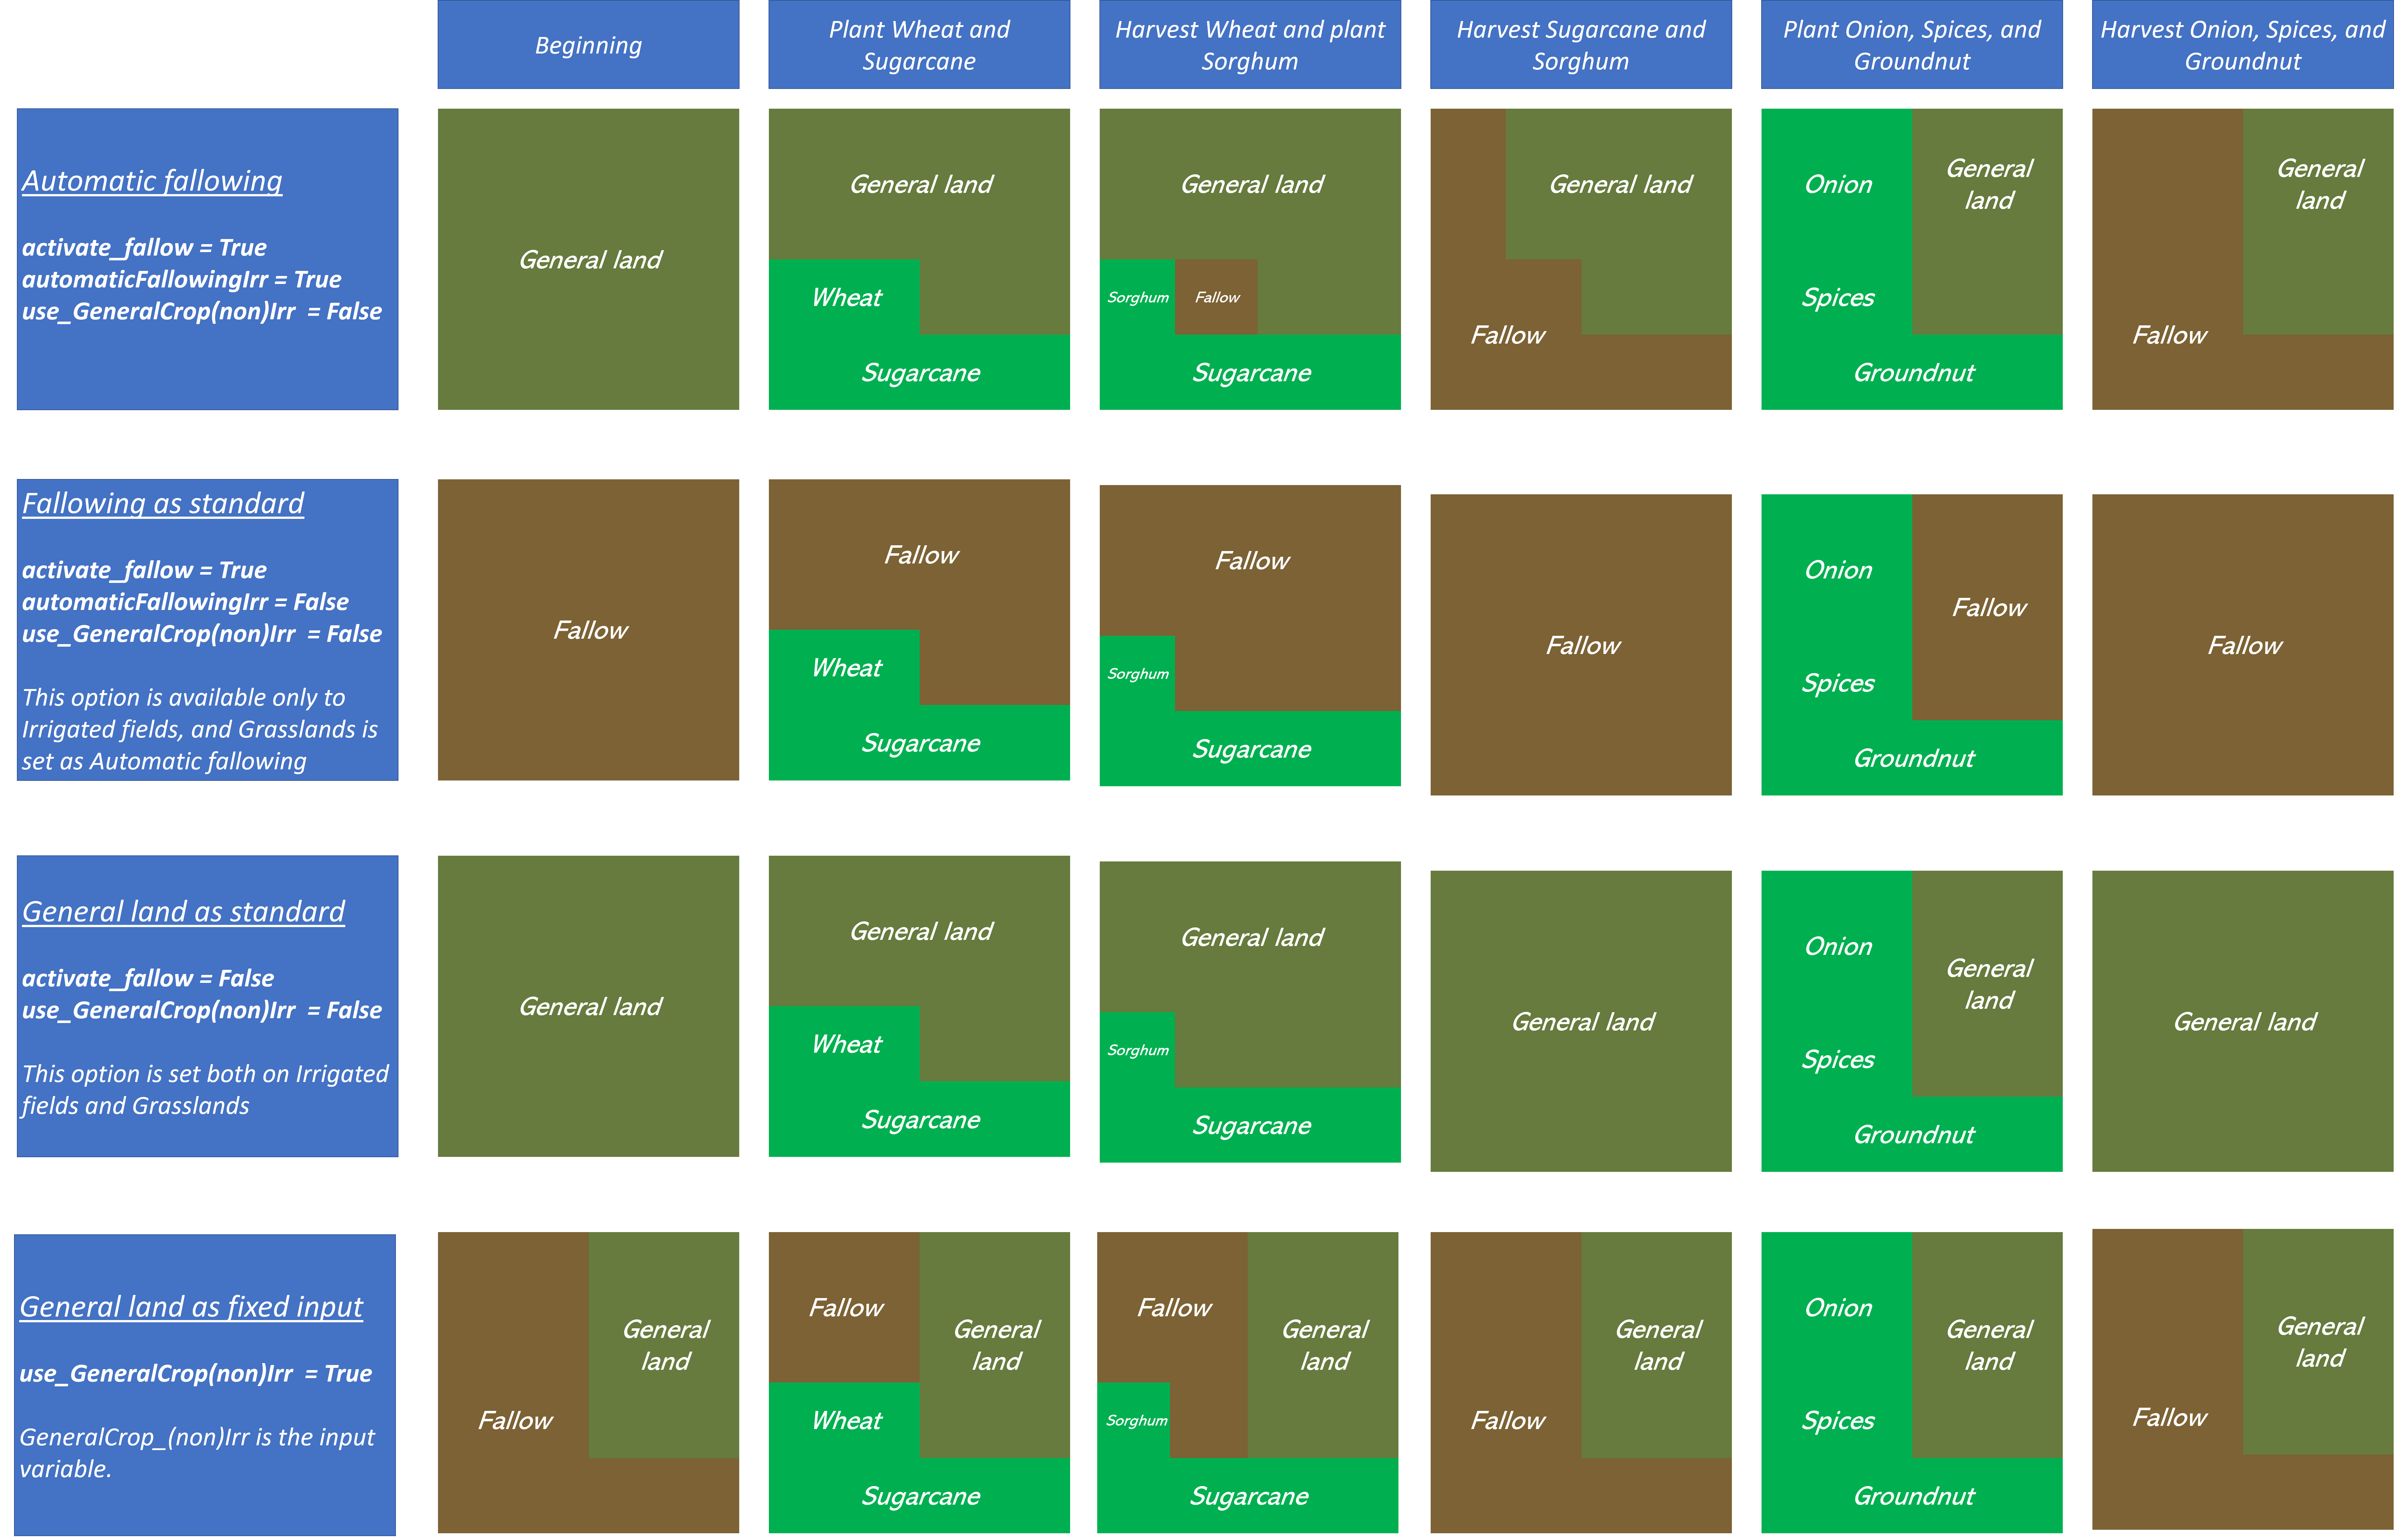

In [2]:
img = Image.open(photo_folder + '/Fallow_GeneralLand.png')
img

## CWatM inputs
CWatM inputs (in **bold**) are set to paths of maps holding the maximum fraction of cells to be attributed to each land type.

- **Forest_fraction**
- **Paddy_fraction**
- **IrrigationEquipped_fraction**
- **Sealed_fraction**
- **Water_fraction**

Grasslands are the remainder and are not an input map.

Each crop named in the settings file is to be attributed with both an irrigated and non-irrigated map. For example, given a crop "Wheat" in the settings file, the inputs to be included would be: 
 - **Wheat_Irr**
 - **Wheat_nonIrr**
 
These inputs are read on the first day of the planting month of the crop.


## Settings


Naming convention: **X(Y)Z** implies that **XY** and **XYZ** are both variables.

- **activate_fallow**

 - True: Fallow lands are a possible land use.
 - False: Fallow lands are not a possible land use. General lands will consume the remainder Irrigated fields and Grasslands not otherwise currently planted with crops. (FUSE)


- **automaticFallowingIrr**

 - True: This intiailly sets all Irrigated fields with General lands and performs an automatic fallowing as crops are sown, replacing General lands. The automatic fallowing is necessary for Grasslands when fallowing is activated, but is an option for Irrigated fields. 
 - False: This option uses no General lands on Irrigated fields and allocates currently available Irrigated fields to fallow land. There is still automatic fallowing on Grasslands assuming activate_fallow = True. (FUSE)


- **use_GeneralCrop(non)Irr** 

 - True: Implies that there is a specific input map for General lands pointed at by **GeneralCrop_(non)Irr**, and that it is to be used. Available Irrigated fields (Grasslands) after considering currently planted specific crops and General lands are made fallow.

 - False: Implies that there is not a specific input map for General lands and it is to be allocated automatically. Note that General land is represented here by the variable name GeneralCrop. This is a "representative" example of its land cagetgory. However, we refer to this as General lands, as crops are specfically those discussed in the Crops tab of the settings file. (FUSE)


- **leftoverIrrigatedCropIsRainfed**
 - True: The proposed irrigated planting of a crop may exceed the available space. This option uses the remaining proposed but not planted irrigated crop as the proposed rainfed planting, overwriting the proposed rainfed planting input.
 - False: Irrigated and rainfed crops are proposed as their inputs indicate.

### <u>FUSE settings</u>

Irrigated fields are fallow when not currently planted and Grasslands that have been sown with a crop are fallow between plantings. Specifically, FUSE uses  <u>Automatic fallowing</u> on grasslands and  <u>Fallowing as standard</u> on Irrigated fields.

- **activate_fallow** = True

- **automaticFallowingIrr** = False

- **use_GeneralCrop(non)Irr** = False

- **leftoverIrrigatedCropIsRainfed** = False



## CWatM Outputs

The following CWatM outputs (in *italics*) are suggested for OUT_MAP_MonthEnd. All of these variables must be output to display the following figures, as well as OUT_MAP_TotalEnd = cellArea. Available land is defined as Irrigated fields and Grasslands not currently growing a crop.

Naming convention: *X(Y)Z* implies that *XY* and *XYZ* are both variables. 

Output | Description | Range
--- | --- | ---
*fracCrops_(non)Irr[c]* | Fraction of crop c currently planted on Irrigated fields(Grasslands) | [0,1]
*fracCrops_(non)IrrLandDemand[c]* |  Fraction of crop c proposed to be planted on Irrigated fields(Grasslands) | [0,1]
*frac_total(non)Irr*| Fraction of specific crops currently planted on Irrigated fields(Grasslands) | [0,1]
*fracVegCover[0...5]*| Fraction attributed to each land cover | [0,1]
*fallow(non)Irr*| Fraction of fallowed land on Irrigated fields(Grasslands) | [0,1]
*GeneralCrop_(non)Irr*| Fraction of general crop on Irrigated fields(Grasslands) | [0,1]
*areaCrops_(non)Irr_segment[c]* | Area ($m^2$) of crop c on Irrigated fields (Grasslands) within prescribed segments | -
*availableArableLand(_segment)* | Area ($m^2$) of available land | -

Explicitly, the Land Cover & Use Outputs for FUSE include:

fracVegCover[0], fracVegCover[1], fracVegCover[2], fracVegCover[3], fracVegCover[4], fracVegCover[5], frac_totalIrr, frac_totalnonIrr, fracCrops_Irr[0],  fracCrops_Irr[1], fracCrops_Irr[2], fracCrops_Irr[3], fracCrops_Irr[4], fracCrops_Irr[5], fracCrops_Irr[6], fracCrops_Irr[7], fracCrops_Irr[8], fracCrops_Irr[9], fracCrops_Irr[10], fracCrops_Irr[11], fracCrops_Irr[12], fracCrops_Irr[13], fracCrops_Irr[14], fracCrops_Irr[15], fracCrops_Irr[16], fracCrops_Irr[17], fracCrops_nonIrr[0], fracCrops_nonIrr[1], fracCrops_nonIrr[2], fracCrops_nonIrr[3], fracCrops_nonIrr[4], fracCrops_nonIrr[5], fracCrops_nonIrr[6], fracCrops_nonIrr[7],  fracCrops_nonIrr[8], fracCrops_nonIrr[9], fracCrops_nonIrr[10], fracCrops_nonIrr[11], fracCrops_nonIrr[12], fracCrops_nonIrr[13], fracCrops_nonIrr[14], fracCrops_nonIrr[15], fracCrops_nonIrr[16], fracCrops_nonIrr[17], fracCrops_IrrLandDemand[0],  fracCrops_IrrLandDemand[1], fracCrops_IrrLandDemand[2], fracCrops_IrrLandDemand[3], fracCrops_IrrLandDemand[4], fracCrops_IrrLandDemand[5], fracCrops_IrrLandDemand[6], fracCrops_IrrLandDemand[7],fracCrops_IrrLandDemand[8], fracCrops_IrrLandDemand[9], fracCrops_IrrLandDemand[10], fracCrops_IrrLandDemand[11], fracCrops_IrrLandDemand[12], fracCrops_IrrLandDemand[13], fracCrops_IrrLandDemand[14], fracCrops_IrrLandDemand[15], fracCrops_IrrLandDemand[16], fracCrops_IrrLandDemand[17], fracCrops_nonIrrLandDemand[0],  fracCrops_nonIrrLandDemand[1], fracCrops_nonIrrLandDemand[2], fracCrops_nonIrrLandDemand[3], fracCrops_nonIrrLandDemand[4], fracCrops_nonIrrLandDemand[5], fracCrops_nonIrrLandDemand[6], fracCrops_nonIrrLandDemand[7], fracCrops_nonIrrLandDemand[8], fracCrops_nonIrrLandDemand[9], fracCrops_nonIrrLandDemand[10], fracCrops_nonIrrLandDemand[11], fracCrops_nonIrrLandDemand[12], fracCrops_nonIrrLandDemand[13], fracCrops_nonIrrLandDemand[14], fracCrops_nonIrrLandDemand[15], fracCrops_nonIrrLandDemand[16], fracCrops_nonIrrLandDemand[17], fallowIrr, fallownonIrr, GeneralCrop_Irr, GeneralCrop_nonIrr, head_development, areaPaddy_Irr_segment, areaCrops_Irr_segment[0], areaCrops_nonIrr_segment[0], areaCrops_Irr_segment[1], areaCrops_nonIrr_segment[1], areaCrops_Irr_segment[2], areaCrops_nonIrr_segment[2], areaCrops_Irr_segment[3], areaCrops_nonIrr_segment[3], areaCrops_Irr_segment[4], areaCrops_nonIrr_segment[4], areaCrops_Irr_segment[5], areaCrops_nonIrr_segment[5], areaCrops_Irr_segment[6], areaCrops_nonIrr_segment[6], areaCrops_Irr_segment[7], areaCrops_nonIrr_segment[7], areaCrops_Irr_segment[8], areaCrops_nonIrr_segment[8], areaCrops_Irr_segment[9], areaCrops_nonIrr_segment[9], areaCrops_Irr_segment[10], areaCrops_nonIrr_segment[10], areaCrops_Irr_segment[11], areaCrops_nonIrr_segment[11], areaCrops_Irr_segment[12], areaCrops_nonIrr_segment[12], areaCrops_Irr_segment[13], areaCrops_nonIrr_segment[13], areaCrops_Irr_segment[14], areaCrops_nonIrr_segment[14], areaCrops_Irr_segment[15], areaCrops_nonIrr_segment[15] , areaCrops_Irr_segment[16], areaCrops_nonIrr_segment[16],  areaCrops_Irr_segment[17], areaCrops_nonIrr_segment[17], availableArableLand, availableArableLand_segment

In [3]:
def crops(xl_settings_file_path):
    import pandas as pd
    df = pd.read_excel(xl_settings_file_path, sheet_name='Crops')
    
    Crops = []
    for i in df.index:
        crop = [df['Planting month'][i]]
        
        for gs in range(1,5):
            gs_parameters = [df['EM'+str(gs)][i], df['KC'+str(gs)][i], df['KY'+str(gs)][i]]
            crop.append(gs_parameters)
        
        Crops.append(crop)
        
def crops_initialise(xl_settings_file_path):
    df = pd.read_excel(xl_settings_file_path, sheet_name='Crops')

    Crops = []
    Crops_names = []
    for i in df.index:
        crop = [df['Planting month'][i]]

        for gs in range(1, 5):
            gs_parameters = [df['EM' + str(gs)][i], df['KC' + str(gs)][i], df['KY' + str(gs)][i]]
            crop.append(gs_parameters)

        Crops.append(crop)
        Crops_names.append(df['Crop'][i])

    return Crops, Crops_names


In [4]:
import time
import pandas as pd
from datetime import date
from netCDF4 import Dataset, num2date
import numpy.ma as ma
import numpy as np

xl_settings_file_path = basepath + r'\CWatM_settings\cwatm_settings.xlsx'
Crops, Crops_names = crops_initialise(xl_settings_file_path)

# fracCrops_(non)Irr[c]
Vars = [['fracCrops_Irr['+str(c)+']',   Crops_names[c],   '%',  'Irrigated Area'] for c in range(len(Crops))]
Vars_nonIrr = [['fracCrops_nonIrr['+str(c)+']',   Crops_names[c], '%','non-Irrigated Area'] for c in range(len(Crops))]

# fracCrops_(non)IrrLandDemand[c]
Vars_proposed_Irr = [['fracCrops_IrrLandDemand['+str(c)+']',   Crops_names[c], '%','Irrigated Area proposed'] for c in range(len(Crops))]
Vars_proposed_nonIrr = [['fracCrops_nonIrrLandDemand['+str(c)+']',   Crops_names[c], '%','non-Irrigated Area proposed'] for c in range(len(Crops))]

# frac_total(non)Irr
Vars_frac_totalIrr = ['frac_totalIrr',   "Total irrigated", '%','Total irrigated and planted']
Vars_frac_totalnonIrr = ['frac_totalnonIrr',   "Total non-irrigated", '%','Total non-irrigated and planted']

# fracVegCover[0...5]
Vars_frac_Forest = ['fracVegCover[0]', 'Forest', '%', 'Forest']
Vars_frac_totalnonIrrLand = ['fracVegCover[1]',   "Total non-Irrigated", '%','Total non-Irrigated land']
Vars_frac_Paddy = ['fracVegCover[2]', 'Paddy', '%', 'Paddy']
Vars_frac_totalIrrLand = ['fracVegCover[3]',   "Total irrigated", '%','Total Irrigated land']
Vars_frac_Sealed = ['fracVegCover[4]', 'Sealed', '%', 'Sealed']
Vars_frac_Water = ['fracVegCover[5]', 'Water', '%', 'Water']

# fallow(non)Irr
Vars_frac_fallowIrr = ['fallowIrr', 'fallowed irrigated land', '%', 'Fallowed Irrigated land']
Vars_frac_fallownonIrr = ['fallownonIrr', 'fallowed non-irrigated land', '%', 'Fallowed non-irrigated land']

# GeneralCrop_(non)Irr
Vars_frac_GeneralIrr = ['GeneralCrop_Irr', 'General irrigated land', '%', 'General irrigated land']
Vars_frac_GeneralnonIrr = ['GeneralCrop_nonIrr', 'General non-irrigated land', '%', 'General non-irrigated land']

Vars.extend(Vars_nonIrr)
Vars.extend(Vars_proposed_Irr )
Vars.extend(Vars_proposed_nonIrr)
Vars.append(Vars_frac_totalIrr)
Vars.append(Vars_frac_totalnonIrr)
Vars.append(Vars_frac_totalIrrLand)
Vars.append(Vars_frac_totalnonIrrLand)
Vars.append(Vars_frac_fallowIrr)
Vars.append(Vars_frac_fallownonIrr)
Vars.append(Vars_frac_GeneralIrr)
Vars.append(Vars_frac_GeneralnonIrr)
Vars.append(Vars_frac_Forest)
Vars.append(Vars_frac_Paddy)
Vars.append(Vars_frac_Sealed)
Vars.append(Vars_frac_Water)


#Vars.append()       ['fracCrops_nonIrr['+str(c)+']',   Crops_names[c],       '%',      'non-Irrigated Area']
keys = [i[-1] for i in Vars]
WB = {key: [] for key in keys} # Creates an empty set relating to each key, overriding the previous to leave only one of each 
#print('keys: ', keys)
cellArea = Dataset(output_folder +'/'+ 'cellArea_totalend.nc', 'r').variables['cellArea_totalend'][:,:]
cellAreaC = ma.compressed(cellArea)

nc_simulated = Dataset(output_folder + '/fracCrops_Irr[1]_monthend.nc', 'r')
Dates_simulation = num2date(nc_simulated.variables['time'][:], units=nc_simulated.variables['time'].units)

for var in Vars:
    
    #print(var[0])
    
    nc_filename = output_folder +'/'+ var[0] + '_monthend.nc'
    temp = Dataset(nc_filename, 'r').variables[var[0]+ '_monthend'][:,:,:]
    Daily_basinSum = []
    
    for d in range(len(Dates_simulation)):
        
        daily_basinSum = np.sum(np.multiply(ma.compressed(temp[d,:,:]), cellAreaC))
        Daily_basinSum.append(daily_basinSum)
    
    WB[var[-1]].append([var[1], np.array(Daily_basinSum)])
    #print([var[1], np.sum(np.array(Daily_basinSum))])
    
Vars2 = [['actTransTotal_grasslands','Transpiration (Grasslands)',   'M',    'actTransTotal_grasslands']]
Vars2.append(['actTransTotal_paddy',     'Transpiration (Paddy)',        'M',    'actTransTotal_paddy']) 
Vars2.append(['actTransTotal_nonpaddy',  'Transpiration (non-Paddy)',    'M',    'actTransTotal_nonpaddy'])
Vars2.append(['act_irrWithdrawal',     'Irrigation withdrawals',        'M',    'Irrigation withdrawals']) 
Vars2.append(['act_nonIrrWithdrawal',  'non-Irrigation withdrawals',    'M',    'non-Irrigation withdrawals'])



nc_simulated2 = Dataset(output_folder + '/actTransTotal_grasslands_daily.nc', 'r')
Dates_simulation2 = num2date(nc_simulated2.variables['time'][:], units=nc_simulated2.variables['time'].units)
#print('days: ', len(Dates_simulation2))
#print('Outptus are in m3 over the simulation period')
LULC_table = {'Outputs':[], 'Billion m3':[]}
for var in Vars2:
    
    #print(var[0])
    
    nc_filename = output_folder +'/'+ var[0] + '_daily.nc'
    temp = Dataset(nc_filename, 'r').variables[var[0]][:,:,:]
    Daily_basinSum = []
    
    for d in range(len(Dates_simulation2)):
        
        daily_basinSum = np.sum(np.multiply(ma.compressed(temp[d,:,:]), cellAreaC))
        Daily_basinSum.append(daily_basinSum)

    #print([var[1], np.sum(np.array(Daily_basinSum))])
    LULC_table['Outputs'].append(var[1])
    LULC_table['Billion m3'].append(np.sum(np.array(Daily_basinSum))/1_000_000_000)

#data_WB = {'Water flows, total':['Inputs', 'Outputs', 'Storage Change', 'Balance', 'Balance over all flows (%):'],'BMC':[  total_input_adjusted/1_000_000_000,   total_output/1_000_000_000,   total_change/1_000_000_000,   balance/1_000_000_000, percent_accurate_WB]}
# Create DataFrame
df = pd.DataFrame(LULC_table)
df=df.style.set_table_styles([{'selector': 'th', 'props': [('font-size', '15pt')]}]).set_properties(**{"font-size": "15pt"}).hide_index()
#display(df)
    


In [5]:
from plotly import graph_objs as go, offline as po, tools
fig_planted_Irr = go.Figure()
fig_planted_nonIrr = go.Figure()
fig_planted_total = go.Figure()


for c in range(len(Crops)):
    fig_planted_Irr.add_trace(go.Scatter(y=WB['Irrigated Area'][c][1],
                             x=Dates_simulation,
                    mode='lines',
                    name=Crops_names[c]))
    
    fig_planted_nonIrr.add_trace(go.Scatter(y=WB['non-Irrigated Area'][c][1],
                         x=Dates_simulation,
                mode='lines',
                name=Crops_names[c]))
    
    fig_planted_total.add_trace(go.Scatter(y=WB['non-Irrigated Area'][c][1]+WB['Irrigated Area'][c][1],
                     x=Dates_simulation,
            mode='lines',
            name=Crops_names[c]))
    
    
    
    
    fig_planted_Irr.add_trace(go.Scatter(y=WB['Irrigated Area proposed'][c][1],
                         x=Dates_simulation,
                mode='lines',
                name='proposed'+Crops_names[c]))
    
    fig_planted_nonIrr.add_trace(go.Scatter(y=WB['non-Irrigated Area proposed'][c][1],
                         x=Dates_simulation,
                mode='lines',
                name='proposed'+Crops_names[c]))
    
    fig_planted_total.add_trace(go.Scatter(y=WB['non-Irrigated Area proposed'][c][1]+WB['Irrigated Area proposed'][c][1],
                     x=Dates_simulation,
            mode='lines',
            name='proposed'+ Crops_names[c]))
    
    
fig_planted_Irr.add_trace(go.Scatter(y=WB['Total Irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='total irrigated land'))

fig_planted_nonIrr.add_trace(go.Scatter(y=WB['Total non-Irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='total non-irrigated land'))   

fig_planted_total.add_trace(go.Scatter(y=WB['Total non-Irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='total non-irrigated land'))
fig_planted_total.add_trace(go.Scatter(y=WB['Total Irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='total irrigated land'))
    

fig_planted_Irr.add_trace(go.Scatter(y=WB['Total irrigated and planted'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='total irrigated crops'))

fig_planted_nonIrr.add_trace(go.Scatter(y=WB['Total non-irrigated and planted'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='total non-irrigated crops'))


fig_planted_total.add_trace(go.Scatter(y=WB['Total irrigated and planted'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='total irrigated crops'))

fig_planted_total.add_trace(go.Scatter(y=WB['Total non-irrigated and planted'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='total non-irrigated crops'))

#dev
fig_planted_total.add_trace(go.Scatter(y=WB['Fallowed Irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='fallowed irrigated crops'))

fig_planted_total.add_trace(go.Scatter(y=WB['Fallowed non-irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='fallowed non-irrigated crops'))


fig_planted_total.add_trace(go.Scatter(y=WB['General irrigated land'][0][1], #WB['Total Irrigated land'][0][1] - WB['Total irrigated and planted'][0][1] - WB['Fallowed Irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='General irrigated crops'))

fig_planted_total.add_trace(go.Scatter(y=WB['General non-irrigated land'][0][1], #y=WB['Total non-Irrigated land'][0][1] - WB['Total irrigated and planted'][0][1] - WB['Fallowed Irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='General non-irrigated crops'))





fig_planted_total.add_trace(go.Scatter(y=WB['Forest'][0][1], #y=WB['Total non-Irrigated land'][0][1] - WB['Total irrigated and planted'][0][1] - WB['Fallowed Irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='Forest'))

fig_planted_total.add_trace(go.Scatter(y=WB['Paddy'][0][1], #y=WB['Total non-Irrigated land'][0][1] - WB['Total irrigated and planted'][0][1] - WB['Fallowed Irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='Paddy'))

fig_planted_total.add_trace(go.Scatter(y=WB['Sealed'][0][1], #y=WB['Total non-Irrigated land'][0][1] - WB['Total irrigated and planted'][0][1] - WB['Fallowed Irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='Sealed'))

fig_planted_total.add_trace(go.Scatter(y=WB['Water'][0][1], #y=WB['Total non-Irrigated land'][0][1] - WB['Total irrigated and planted'][0][1] - WB['Fallowed Irrigated land'][0][1],
             x=Dates_simulation,
    mode='lines',
    name='Water'))







fig_planted_Irr.update_layout(title='Crops irrigated and planted',
                       xaxis_title = 'Months',
                       yaxis_title = 'Area (m2)')

fig_planted_Irr.update_layout(title='Crops non-irrigated and planted',
                       xaxis_title = 'Months',
                       yaxis_title = 'Area (m2)')

fig_planted_Irr.update_layout(title='Crops total planted',
                       xaxis_title = 'Months',
                       yaxis_title = 'Area (m2)')


fig_planted_Irr.update_layout(title='Crops irrigated and planted',
                       xaxis_title = 'Months',
                       yaxis_title = 'Area (m2)',  template='plotly_dark')

fig_planted_nonIrr.update_layout(title='Crops non-irrigated and planted',
                       xaxis_title = 'Months',
                       yaxis_title = 'Area (m2)',  template='plotly_dark')

fig_planted_total.update_layout(title='Crops total planted',
                       xaxis_title = 'Months',
                       yaxis_title = 'Area (m2)', template='plotly_dark')

#fig_planted_Irr.show()
#fig_planted_nonIrr.show()
#fig_planted_total.show()

In [6]:
run ./6_Maps_CWatM.ipynb

In [7]:
output_folder = original_outputFolder #'C:/CWatM_output' #_Examples/CWatM_output_2015'

In [8]:
#display_map('frac_totalIrr_monthend', day=-1, daySum= True, Rad=2, colourScale ='BrBG', dark=False,outputFolder = output_folder) #)2.6) #colourScale='balance_r'
#display_map('areaCrops_Irr_segment[0]_monthend', day=-5, Rad=2.1,  colourScale ='BrBG',dark=False, outputFolder = output_folder) #)2.6) #colourScale='balance_r'

#display_map('availableArableLand_segment_monthend', day=-1, Rad=2, colourScale ='BrBG', dark=False,outputFolder = output_folder) #)2.6) #colourScale='balance_r'
#display_map('availableArableLand_monthend', day=-1, Rad=2, colourScale ='BrBG', dark=False,outputFolder = output_folder) #)2.6) #colourScale='balance_r'

#display_map('fracCrops_Irr[0]_monthend', day=-1, Rad=2.1,  colourScale ='BrBG',dark=False, outputFolder = output_folder) #)2.6) #colourScale='balance_r'
#display_map('frac_totalIrr_monthend',  day=-1, Rad=2.1, colourScale ='BrBG', dark=False,outputFolder = output_folder) #)2.6) #colourScale='balance_r'
#display_map('fracVegCover[1]_monthend', day=-1, Rad=2.1,  colourScale ='BrBG',dark=False, outputFolder = output_folder) #)2.6) #colourScale='balance_r'
#display_map_sum('fracVegCover[3]_monthend', 'fracVegCover[1]_monthend', day=-1, difference = False, Rad=2, colourScale ='BrBG', dark=False,outputFolder = output_folder) #)2.6) #colourScale='balance_r'
#display_map('frac_totalIrr_monthend', day=-1, Rad=2, colourScale ='BrBG', dark=False,outputFolder = output_folder) #)2.6) #colourScale='balance_r'


## Experiments

The outputs that are most responsive to changes in land cover and use generally include:
- Transpiration on Irrigated fields
- Transpiration on Grasslands
- Irrigation abstractions

#### Irrigated fields are reduced by 20%

<u> Highlights from an automatic demonstration of May 29, 2014- Jan 1, 2016.</u> 
 - Transpiration on Irrigated fields decreases 11%
 - Transpiration on Grasslands increases 14% 
 - Total transpiration is relatively unchanged
 
 
 - Irrigation abstractions decrease 6% 
 - non-Irrigation abstractions are relatively unchanged
 - Total water abstractions decrease by 5%.
 
 
 - Downstream release increases by 45%, but in this drier period, discharge goes from 0.5% to 0.8% of total outputs.

<u> Highlights from an automatic demonstration of one year May 1, 1997-98. </u> 
 - Transpiration on Irrigated fields decreases 13%
 - Transpiration on Grasslands increases 17% 
 - Total transpiration is relatively unchanged
 
 
 - Irrigation Surface water abstractions decrease 7.5% 
 - Irrigation Groundwater abstractions decrease 12.5%
 - Total irrigation water abstractions decrease by 8.5%
 
 
 - Downstream release increases slightly by 3% 
 - Groundwater recharge increases slightly by 3% 
 



#### General land is the default for non-planted fields, compared with fallowing.

<u> Highlights from an automatic demonstration of one year May 1, 1997-98.</u> 

 - Transpiration on Irrigated fields increases 11%
 - Transpiration on Grasslands increases 1%
 - Total transpiration increases 5%.
 
 
 - Irrigation Surface water abstractions increase by 8% 
 - Irrigation Groundwater abstractions increase by 2%
 - Total irrigation water abstractions increase by 4%
 
 
 - Downstream release decreases by 9.5%
 - Groundwater recharge remains unchanged.

In [9]:
#display_map_sum('fracVegCover[3]_monthend', 'fracVegCover[1]_monthend', day=-1, difference = False, Rad=2, colourScale ='BrBG', dark=False,outputFolder = output_folder) #)2.6) #colourScale='balance_r'
#display_map_sum_differentRuns('discharge_annualtot', day=-1, calcDifference = True, Rad=2, colourScale ='RdBu_r', dark=False,outputFolder = output_folder, outputFolder2 = 'C:\CWatM_output_Examples\CWatM_output_10Oct_1111') #)2.6) #colourScale='balance_r'
#display_map('actTransTotal_nonpaddy_annualtot', day=-1, Rad=2, colourScale ='BrBG', dark=False,outputFolder = output_folder) #)2.6) #colourScale='balance_r'
#display_map('actTransTotal_nonpaddy_annualtot', day=-1, Rad=2, colourScale ='BrBG', dark=False,outputFolder = 'C:\CWatM_output_Examples\CWatM_output_10Oct_1111') #)2.6) #colourScale='balance_r'

#display_map_sum_differentRuns('discharge_annualtot', day=-1, calcDifference = True, Rad=5, colourScale ='RdBu_r', dark=False,outputFolder = 'C:\CWatM_output_Examples\CWatM_output_full2015_reducedIrrigation', outputFolder2 = 'C:\CWatM_output_Examples\CWatM_output_full2015_normal') #)2.6) #colourScale='balance_r'
#display_map_sum_differentRuns('actual_totalWithdrawal_annualtot', day=-1, calcDifference = True, Rad=2, colourScale ='RdBu_r', dark=False,outputFolder = 'C:\CWatM_output_Examples\CWatM_output_oneYear_noFallow', outputFolder2 = 'C:\CWatM_output_Examples\CWatM_output_oneYear_FallowAsStandard') #)2.6) #colourScale='balance_r'

